You measure the position of a quasar N times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma = 0.2$

Part 1
- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, 
$p(x_i | \mu, \sigma)$.
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset 
). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using np.argsort)
- Compare it with the MLE estimator derived above

Part 2
Check the Fisher matrix error estimate makes sense:
- do a rough $2^{nd}$ order differentation of our log-likelihood function with np.diff,
- divide through by our $\Delta \theta^2$ to get the correct normalization,
- multiply by -1,
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

Part 3  
Let's make our model more realistic. Our N measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distributed with mean 0.2 and standard deviation 0.5

Generalize your code from above to this case

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

from sympy import symbols, latex
from IPython.display import display, Math

In [30]:
# Useful variables
mu = 1 # mean
sigma = 0.2 # homoscedatic error

N = 1000 # number of data

# Generate the data
data = np.random.normal(mu, sigma, N)

# Define the x grid
x = np.linspace(np.min(data) - 4 * sigma, np.max(data) + 4 * sigma, 10000)

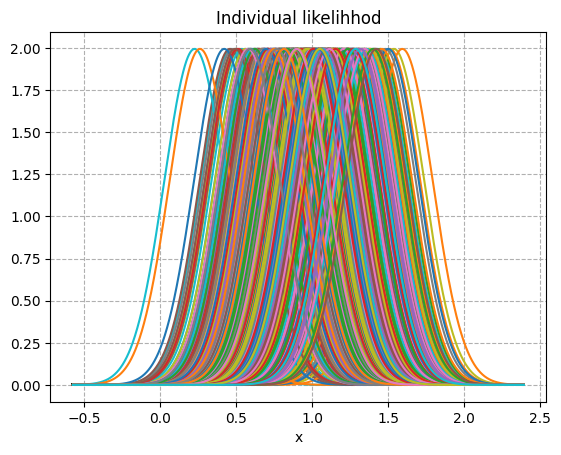

In [31]:
# Plot the likelihood for each data
plt.figure()
for i in data:
    plt.plot(x, stats.norm.pdf(x, i, sigma))
plt.title('Individual likelihhod')
plt.xlabel('x')
plt.grid(linestyle='--')
plt.show()

<IPython.core.display.Math object>

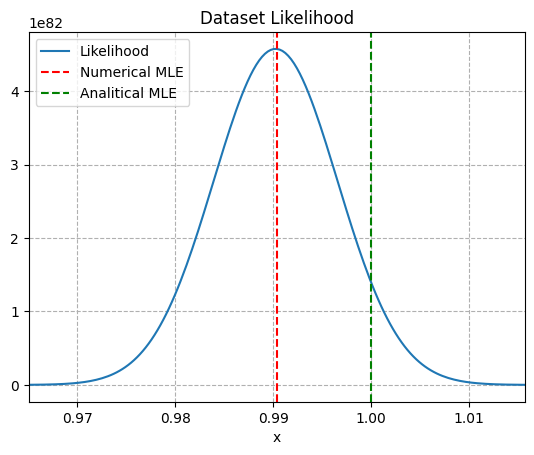

In [32]:
# Dataset likelihood (product of the gaussian)
L = np.prod([stats.norm.pdf(x, i, sigma) for i in data], axis=0)
max_L = x[np.argmax(L)] # maximum of the likelihood
#print(L)
#print(max_L)

# Compare the likelihood maximum with the expected value (mu)
delta_mu = abs(max_L - mu)
# Formatting in scientific notation
formatted_delta_mu = f"{delta_mu:.2e}"
mantissa, exp = formatted_delta_mu.split("e") # split mantissa and exponent
exp = int(exp)  # convert exponent to integer
latex_str = r"|\^\mu - \mu| = " + f"{mantissa} \\times 10^{{{exp}}}"
display(Math(latex_str))

# Plot the dataset likelihood
plt.figure()
plt.xlim(max_L - 4 * sigma / np.sqrt(N), max_L + 4 * sigma / np.sqrt(N))
plt.plot(x, L , label='Likelihood')
plt.axvline(max_L, linestyle='--', color='red', label='Numerical MLE')
plt.axvline(mu, linestyle='--', color='green', label='Analitical MLE')
plt.title('Dataset Likelihood')
plt.xlabel('x')
plt.grid(linestyle='--')
plt.legend()
plt.show()

In [33]:
# Define the log-likelihood
log_L = np.sum(np.log([stats.norm.pdf(x, i, sigma) for i in data]), axis=0)

'''# Check: Plot
plt.figure()
plt.plot(x, log_L, label='Log-Likelihood')
plt.title('Dataset Log-Likelihood')
plt.xlabel('x')
plt.grid(linestyle='--')
plt.legend()
plt.show()'''

# Compute the Fisher Matrix
dx = x[1] - x[0]
F = (-np.diff(log_L, n=2) / dx**2)[np.argmax(L)]
sigma_F = np.sqrt(F**(-1))
#print(F)
#print(sigma_F)

# Compare the Fisher Matrix error with the expected value (sigma/np.sqrt(N))
delta_sigma = abs(sigma_F - sigma / np.sqrt(N))
# Formatting in scientific notation
formatted_delta_sigma = f"{delta_sigma:.2e}"
mantissa, exp = formatted_delta_sigma.split("e") # split mantissa and exponent
exp = int(exp)  # convert exponent to integer
latex_str = r"|\sigma_F - \frac{\sigma}{\sqrt{N}}| = " + f"{mantissa} \\times 10^{{{exp}}}"
display(Math(latex_str))

<IPython.core.display.Math object>

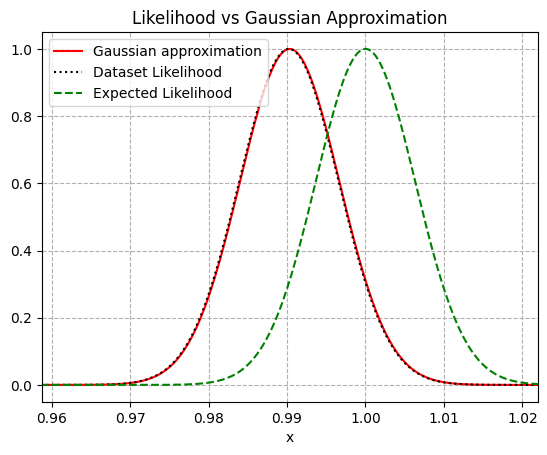

In [34]:
# Plot a Gaussian at the measured mu with this error as the scale to see if it matches the numerical likelihood distribution 
gaussian_approx = stats.norm.pdf(x, max_L, sigma_F)
gaussian_normalized = gaussian_approx / np.max(gaussian_approx)  # Normalize the Gaussian

gaussian_expected = stats.norm.pdf(x, mu, sigma / np.sqrt(N))
gaussian_expected_normalized = gaussian_expected / np.max(gaussian_expected)

plt.figure()
plt.xlim(max_L - 5 * sigma / np.sqrt(N), max_L + 5 * sigma / np.sqrt(N))
plt.plot(x, gaussian_normalized, color='red', label='Gaussian approximation')
plt.plot(x, L / np.max(L), linestyle=':', color='black', label='Dataset Likelihood')
plt.plot(x, gaussian_expected_normalized, linestyle='--', color='green', label="Expected Likelihood")
plt.xlabel('x')
plt.title('Likelihood vs Gaussian Approximation')
plt.legend()
plt.grid(linestyle='--')
plt.show()

Generalization the heteroscedastic gaussian -- there is something wrong!

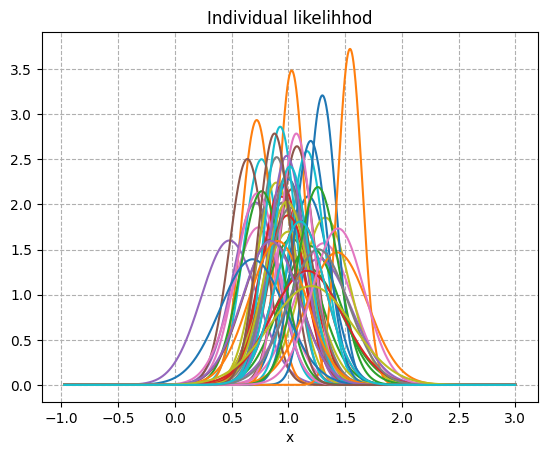

In [35]:
N = 50
mu = 1
sigma = 0.2
sigma_std = 0.05

# Generate the data
data = np.random.normal(mu, sigma, N)

# Define the x grid
x = np.linspace(np.min(data) - 4 * sigma, np.max(data) + 4 * sigma, 10000)

# Generate the sigma_i for each measurment
sigma_i = np.random.normal(sigma, sigma_std, N)

# Define the x grid
x = np.linspace(np.min(data) - 4 * np.max(sigma_i), np.max(data) + 4 * np.max(sigma_i), 10000)

# Plot the likelihood for each data
plt.figure()
for i in range(0, len(data)):
    L_i = stats.norm.pdf(x, data[i], sigma_i[i])
    plt.plot(x, L_i)
plt.title('Individual likelihhod')
plt.xlabel('x')
plt.grid(linestyle='--')
plt.show()

<IPython.core.display.Math object>

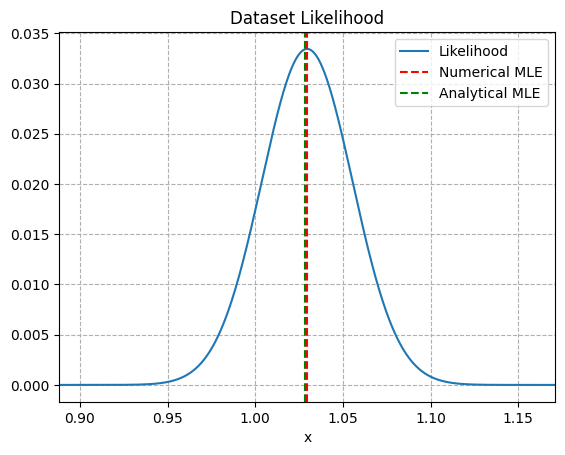

In [36]:
# Dataset likelihood (product of the individual Gaussian likelihoods)
L = np.prod([stats.norm.pdf(x, i, s_i) for i, s_i in zip(data, sigma_i)], axis=0)
#print(L)
# Check if L contains only zeros
if np.all(L == 0):
    print("Warning: L contains only zeros!")

max_L = x[np.argmax(L)]  # maximum of the likelihood

# Compare the likelihood maximum with the expected value (weighted mean)
delta_mu = abs(max_L - np.average(data, weights=sigma_i))
formatted_delta_mu = f"{delta_mu:.2e}"
mantissa, exp = formatted_delta_mu.split("e")
exp = int(exp)
latex_str = r"|\hat{\mu} - \mu| = " + f"{mantissa} \\times 10^{{{exp}}}"
display(Math(latex_str))

# Plot the dataset likelihood
plt.figure()
plt.xlim(max_L - 5 * sigma / np.sqrt(N), max_L + 5 * sigma / np.sqrt(N))
plt.plot(x, L, label='Likelihood')
plt.axvline(max_L, linestyle='--', color='red', label='Numerical MLE')
plt.axvline(np.average(data, weights=sigma_i), linestyle='--', color='green', label='Analytical MLE')
plt.title('Dataset Likelihood')
plt.xlabel('x')
plt.grid(linestyle='--')
plt.legend()
plt.show()

In [37]:
# Compute the Fisher Matrix
dx = x[1] - x[0]
F = (- np.diff(log_L, n=2) / dx**2)[np.argmax(L)]
sigma_F = np.sqrt(F**(-1))

# Compare the Fisher Matrix error with the expected value
delta_sigma = abs(sigma_F - (np.sum(1 / sigma_i**2))**(-0.5))
formatted_delta_sigma = f"{delta_sigma:.2e}"
mantissa, exp = formatted_delta_sigma.split("e")
exp = int(exp)
latex_str = r"|\sigma_F - (\sum{\frac{1}{\sigma_i^2}})^{-1/2}| = " + f"{mantissa} \\times 10^{{{exp}}}"
display(Math(latex_str))

<IPython.core.display.Math object>

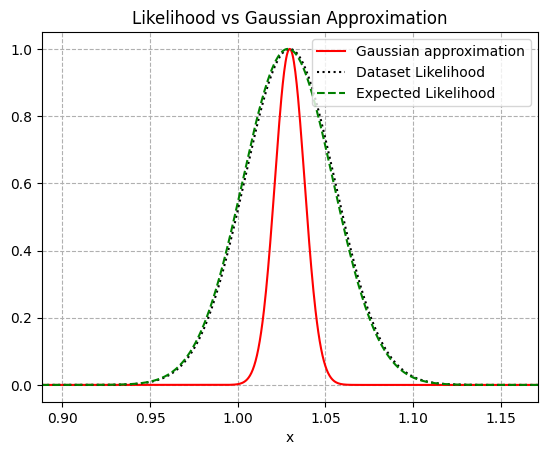

In [38]:
# Plot a Gaussian at the measured mu with this error as the scale to see if it matches the numerical likelihood distribution 
gaussian_approx = stats.norm.pdf(x, max_L, sigma_F)
gaussian_normalized = gaussian_approx / np.max(gaussian_approx)

# Compare with the expected Gaussian
gaussian_expected = stats.norm.pdf(x, np.average(data, weights=sigma_i), (np.sum(1 / sigma_i**2))**(-0.5))
gaussian_expected_normalized = gaussian_expected / np.max(gaussian_expected)

plt.figure()
plt.xlim(max_L - 5 * sigma / np.sqrt(N), max_L + 5 * sigma / np.sqrt(N))
plt.plot(x, gaussian_normalized, color='red', label='Gaussian approximation')
plt.plot(x, L / np.max(L), linestyle=':', color='black', label='Dataset Likelihood')
plt.plot(x, gaussian_expected_normalized, linestyle='--', color='green', label="Expected Likelihood")
plt.xlabel('x')
plt.title('Likelihood vs Gaussian Approximation')
plt.legend()
plt.grid(linestyle='--')
plt.show()